In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [2]:
file_list = glob("./data/*")
file_list

['./data\\conversionRates.csv',
 './data\\freeformResponses.csv',
 './data\\multipleChoiceResponses.csv',
 './data\\RespondentTypeREADME.txt',
 './data\\schema.csv']

In [3]:
mcq = pd.read_csv(file_list[4])
mcq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Column    290 non-null    object
 1   Question  290 non-null    object
 2   Asked     290 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


In [4]:
mcq.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [5]:
mca = pd.read_csv(file_list[2], encoding="cp437", low_memory=False)
mca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Columns: 228 entries, GenderSelect to JobFactorPublishingOpportunity
dtypes: float64(13), object(215)
memory usage: 29.1+ MB


In [6]:
mca.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
mcq[mcq["Column"] == "LanguageRecommendationSelect"]

,Column,Question,Asked
18,LanguageRecommendationSelect,What programming language would you recommend ...,All


In [8]:
mca.loc[:, mca.columns == "LanguageRecommendationSelect"].value_counts().head()

LanguageRecommendationSelect
Python                          6941
R                               2643
SQL                              385
C/C++/C#                         307
Matlab                           238
dtype: int64

In [9]:
mca["LanguageRecommendationSelect"].value_counts().index

Index(['Python', 'R', 'SQL', 'C/C++/C#', 'Matlab', 'Java', 'Scala', 'SAS',
       'Other', 'Julia', 'Stata', 'Haskell', 'F#'],
      dtype='object')

<Axes: xlabel='count', ylabel='LanguageRecommendationSelect'>

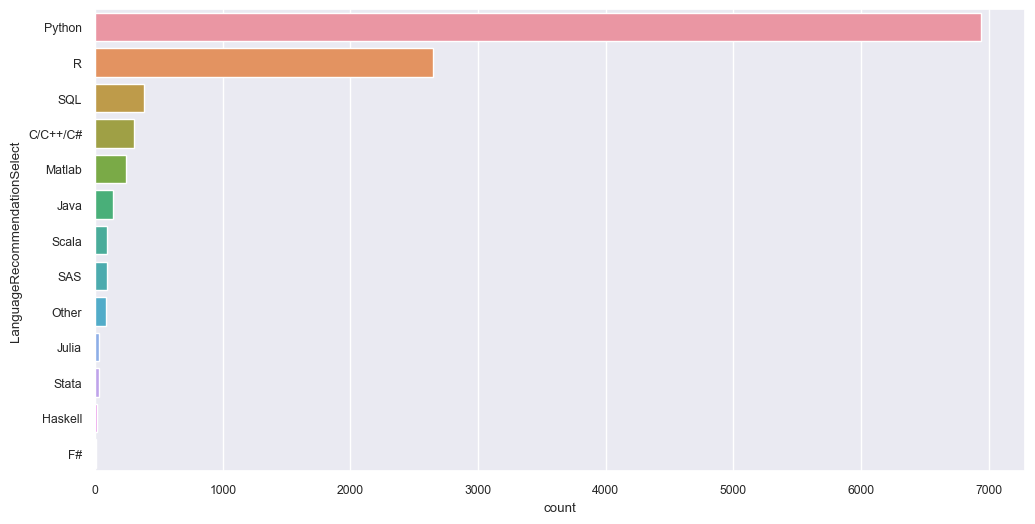

In [10]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=0.8)
sns.countplot(mca, y="LanguageRecommendationSelect", order=mca["LanguageRecommendationSelect"].value_counts().index)

In [11]:
mca["CurrentJobTitleSelect"].value_counts().head()

Data Scientist                          2433
Software Developer/Software Engineer    1759
Other                                   1233
Data Analyst                            1213
Scientist/Researcher                     978
Name: CurrentJobTitleSelect, dtype: int64

<Axes: xlabel='count', ylabel='CurrentJobTitleSelect'>

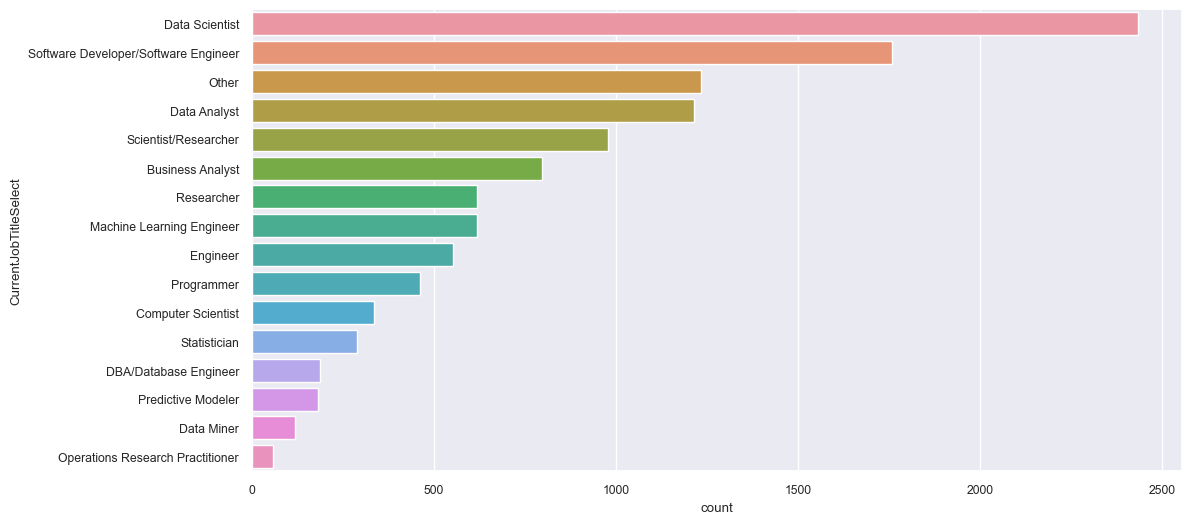

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(mca, y="CurrentJobTitleSelect", order=mca["CurrentJobTitleSelect"].value_counts().index)

In [13]:
# count() Method는 Nan 컬럼은 세지 않는다.
mca["CurrentJobTitleSelect"].count()

11830

In [20]:
# 컬럼 값이 Null(Nan)인 아이들만...
mca["CurrentJobTitleSelect"].isnull().sum()

4886

In [22]:
# 컬럼 수 세기
mca["CurrentJobTitleSelect"].notnull().count()

16716

In [16]:
mca["LanguageRecommendationSelect"].value_counts()

Python      6941
R           2643
SQL          385
C/C++/C#     307
Matlab       238
Java         138
Scala         94
SAS           88
Other         85
Julia         30
Stata         28
Haskell       17
F#             4
Name: LanguageRecommendationSelect, dtype: int64

In [23]:
data = mca[(mca["LanguageRecommendationSelect"] == "Python") | (mca["LanguageRecommendationSelect"] == "R")]
data.shape

(9584, 228)

In [24]:
mca[mca["CurrentJobTitleSelect"].notnull() & ((mca["LanguageRecommendationSelect"] == "Python") | (mca["LanguageRecommendationSelect"] == "R"))]["CurrentJobTitleSelect"].count()

7158

<Axes: xlabel='count', ylabel='CurrentJobTitleSelect'>

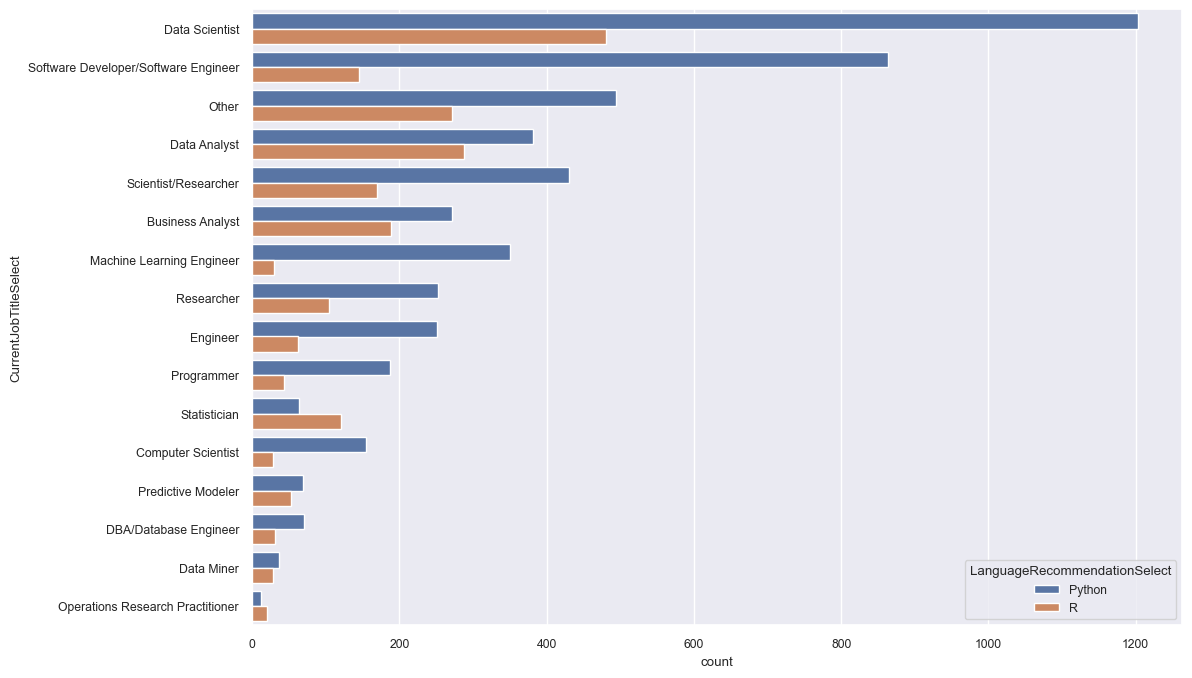

In [27]:
plt.figure(figsize=(12, 8))
sns.countplot(data,
              y="CurrentJobTitleSelect",
              hue="LanguageRecommendationSelect",
              order=data["CurrentJobTitleSelect"].value_counts().index)

In [ ]:
data.pivot_table("EmploymentStatus", index=["CurrentJobTitleSelect"], columns=["LanguageRecommendationSelect"], aggfunc="count")

In [ ]:
data.groupby(["CurrentJobTitleSelect", "LanguageRecommendationSelect"])["CurrentJobTitleSelect"].count()

In [ ]:
tool_count_df = pd.DataFrame(mca["MLToolNextYearSelect"].value_counts())
tool_count_df

In [ ]:
tool_rate_df = pd.DataFrame(mca["MLToolNextYearSelect"].value_counts(normalize=True))
tool_rate_df

In [52]:
tool_df = pd.concat([tool_count_df, tool_rate_df], axis=1)
tool_df.columns = ["응답수", "비율"]
data = tool_df.head(20)
data

,응답수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


<Axes: xlabel='응답수'>

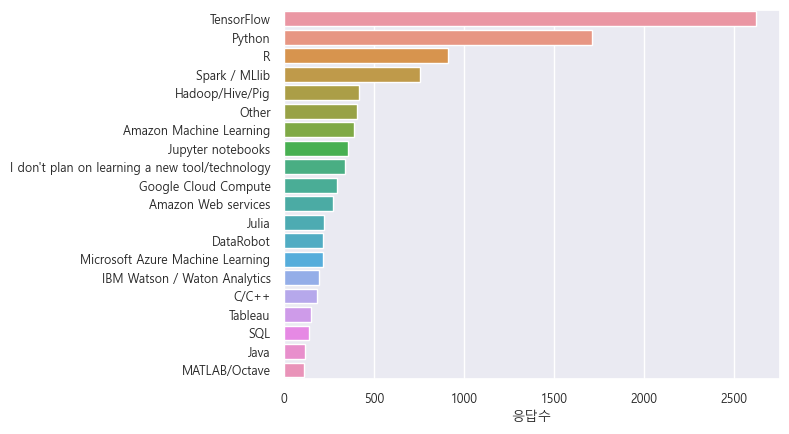

In [54]:
sns.set(font="Malgun Gothic", font_scale=0.8)
sns.barplot(data, y=data.index, x="응답수")

In [61]:
data =mca["MLMethodNextYearSelect"].value_counts().head(15)
data.values

array([4362, 1386,  680,  511,  493,  425,  364,  307,  269,  258,  230,
        220,  216,  195,  156], dtype=int64)

<Axes: >

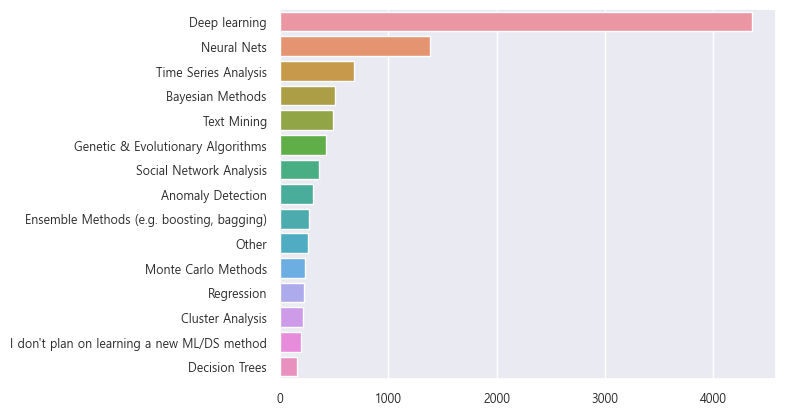

In [64]:
sns.barplot(y=data.index, x=data.values)

In [65]:
mca["LearningPlatformSelect"]

0        College/University,Conferences,Podcasts,Trade ...
1                                                   Kaggle
2        Arxiv,College/University,Kaggle,Online courses...
3        Blogs,College/University,Conferences,Friends n...
4                        Arxiv,Conferences,Kaggle,Textbook
                               ...                        
16711                                                  NaN
16712    Kaggle,Non-Kaggle online communities,Online co...
16713                                                  NaN
16714                                                  NaN
16715                                                  NaN
Name: LearningPlatformSelect, Length: 16716, dtype: object